<a href="https://colab.research.google.com/github/shoabahamed/kaggle_notebooks/blob/main/classification_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
# analysis
import pandas as pd
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# processing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StratifiedKfold
from scipy import stats
from sklearn.preprocessing import PowerTransformer

# helper
from pathlib import Path
import warnings

warnings.filterwarnings('ignore') #supress warnings
sns.set(style='darkgrid') # set theme for plotting
pd.set_option('display.float_format', lambda x: '%.5f' % x)

<h2> WE WILL DO THE FOLLOWING THINGS IN ORDER</h2>

- Brief overview of the dataset
- Data Cleaning
- EDA
- Feature engineering
- spliting into train, validation dataset
- Missing Values
- Feature Selection
- Preprocessing
- establish a baseline model
- find the best models
- use the best models to make prediction

****EDA, Feature Engineering or Missing values these three steps depends on person to person and project depended.****
****Normally you would do data cleaning for small dataset like these on spreadsheet but we will do data cleaning in python whenever we spot any unusal values or problems****

# DATASET OVERVIEW

In [141]:
# loading dataset

# path = Path('../input/predict-loan-amount-data/')
path = Path('/content/')

train = pd.read_csv(path / 'train.csv')
test = pd.read_csv(path / 'test.csv')

train.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05000,Low,Working,Sales staff,Semi-Urban,72809.58000,...,809.44000,0,NaN,746,1933.05000,4,Rural,1,119933.46000,54607.18000
1,C-33999,America Calderone,M,32,4952.91000,Low,Working,NaN,Semi-Urban,46837.47000,...,780.40000,0,Unpossessed,608,4952.91000,2,Rural,1,54791.00000,37469.98000
2,C-3770,Rosetta Verne,F,65,988.19000,High,Pensioner,NaN,Semi-Urban,45593.04000,...,833.15000,0,Unpossessed,546,988.19000,2,Urban,0,72440.58000,36474.43000
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92000,...,832.70000,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51000,56040.54000
4,C-23459,Afton Venema,F,31,2614.77000,Low,Working,High skill tech staff,Semi-Urban,113858.89000,...,745.55000,1,Active,715,2614.77000,4,Semi-Urban,1,208567.91000,74008.28000


In [4]:
# cheking the datasets shape
train_rows, train_cols = train.shape[0], train.shape[1]
test_rows, test_cols = test.shape[0], test.shape[1]
  

print(f"The training dataframe has {train_rows} rows and {train_cols} cols")
print(f"The training dataframe has {test_rows} rows and {test_cols} cols")

The training dataframe has 30000 rows and 24 cols
The training dataframe has 20000 rows and 23 cols


In [5]:
# data types
print("TRAINING SET:\n")
display(train.dtypes)

print("\nTEST SET: \n")
display(test.dtypes)

TRAINING SET:



Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object


TEST SET: 



Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                    object
Property Price                  object
dtype: object

In [6]:
# mismatches data types
for col in train.columns:
    if col == 'Loan Sanction Amount (USD)':
        continue
        
    train_dtype = train[col].dtype
    test_dtype = test[col].dtype
    
    if train_dtype != test_dtype:
        print(col)

Co-Applicant
Property Price


some data types in test set does not match with the training dataset like-
* Co-Applicant, Property Price

or what they actually contain like -
* Property Type(contain integar values while it is actually categorical feataure)

In [7]:
# missing values
print('TRAINING SET MISSING VALUES: \n')
display(train.isnull().sum().sort_values(ascending=False))

print('\nTEST SET MISSING VALUES: \n')
display(test.isnull().sum().sort_values(ascending=False))

TRAINING SET MISSING VALUES: 



Type of Employment             7270
Property Age                   4850
Income (USD)                   4576
Dependents                     2493
Credit Score                   1703
Income Stability               1683
Has Active Credit Card         1566
Property Location               356
Loan Sanction Amount (USD)      340
Current Loan Expenses (USD)     172
Gender                           53
Property Price                    0
Co-Applicant                      0
Property Type                     0
Property ID                       0
Customer ID                       0
No. of Defaults                   0
Name                              0
Expense Type 1                    0
Loan Amount Request (USD)         0
Location                          0
Profession                        0
Age                               0
Expense Type 2                    0
dtype: int64


TEST SET MISSING VALUES: 



Type of Employment             4689
Dependents                     1142
Has Active Credit Card         1076
Property Age                    892
Income Stability                813
Income (USD)                    750
Credit Score                    743
Property Location               160
Current Loan Expenses (USD)      83
Gender                           31
Customer ID                       0
No. of Defaults                   0
Co-Applicant                      0
Property Type                     0
Property ID                       0
Expense Type 1                    0
Expense Type 2                    0
Name                              0
Loan Amount Request (USD)         0
Location                          0
Profession                        0
Age                               0
Property Price                    0
dtype: int64

In [8]:
train_cells, test_cells = (train_rows * train_cols), (test_rows * test_cols)
train_missing = train.isnull().sum().sum()
test_missing = test.isnull().sum().sum()

print(f"Missing values in train set {round((train_missing / train_cells) * 100, 3)}%")
print(f"Missing values in train set {round((test_missing / test_cells) * 100, 3)}%")

Missing values in train set 3.481%
Missing values in train set 2.256%


Not all columns has null values and percentage of null values are also low in train and test set

****checking for duplicates****

In [9]:
#  checking for duplicated rows 
train.duplicated(keep=False).sum()

0

In [10]:
train_duplicates = train.duplicated(subset=['Customer ID'], keep='first')
test_duplicates = test.duplicated(subset=['Customer ID'], keep='first')

print(f'There are {train_duplicates.sum()} is the training dataset')
print(f'There are {test_duplicates.sum()} is the test dataset')

There are 0 is the training dataset
There are 0 is the test dataset


****checking cardiniality****
<br>Generally too many cardiniality(unique values) in a feature is not good for making predictions as too many unique category means less examples for each unique value. So models can not learn from each category. Moreover if we use a feature with high cardinality and one hot encode it there would be too many new features created

In [11]:
train.nunique().sort_values(ascending=False)

Customer ID                    30000
Name                           30000
Loan Amount Request (USD)      29982
Property Price                 29632
Income (USD)                   24429
Property Age                   24179
Current Loan Expenses (USD)    24041
Loan Sanction Amount (USD)     21450
Credit Score                   17586
Property ID                      999
Age                               48
Type of Employment                18
Dependents                        10
Profession                         8
Property Type                      4
Location                           3
Has Active Credit Card             3
Property Location                  3
Co-Applicant                       3
Expense Type 1                     2
Income Stability                   2
No. of Defaults                    2
Gender                             2
Expense Type 2                     2
dtype: int64

Many feature has high cardinality which was to be accepted as the features with high cardianility are mostly contain unique and continous values

****INSIGTS:****
  * There are enough data for trianing with 30000 observation
  * Co-Applicant, Property Price, Property Type data types do not match with what type of values they actually contain
  * There are not not that many missing values with only 3.5 percent of overall values missing in training set
  * There are null values in target <b>Loan Sanction Amount</b> 
  * There are not duplicate rows in training dataset
  * Customer Id, Name can not be used to gain any information about target value as they contain unique values and can not be feature engineered to create new useful feature like we all already have Gender feature which could have been derieved from Name if Gender featrue was not already  present
  
****NOTES:****
  * Converty Co-Applicant, Property Price, Property Type to correct data type
  * Drop Name feature for now
  * Drop rows which has null in it's target values

# DATA CLEANING
We will identify the most common problems found in a dataset and solve them
* Searching for null values (completed in previous part)
* Mismatches Data types(completed in previous part)
* Misspelled words in columns values
* Mistyped values or unusual values
* Extra spaces 
* Duplicates
* In consistent date formats
* any other problems

#We start will cleaning based on the insights gained in ****DATASET OVERVIEW**** step

In [12]:
columns = ['Property Price', 'Co-Applicant', 'Property Type']
test[columns].head()

,Property Price,Co-Applicant,Property Type
0,236644.5,1,2
1,142357.3,1,1
2,300991.24,1,1
3,125612.1,0,1
4,180908.0,1,4


Co-Applicant, Property Price are integar type values but they are object type one possible reason for it be that there are some string values in these column

In [13]:
test['Co-Applicant'].unique()

array(['1', '0', '?'], dtype=object)

In [14]:
test[test['Property Price'] == '?']['Property Price'].head()

22     ?
149    ?
356    ?
402    ?
403    ?
Name: Property Price, dtype: object

In [15]:
# Property Price and Co-Applicant has ? 
# we need to replace wtih null first before converting them to int or float

test[['Property Price', 'Co-Applicant']] = test[['Property Price', 'Co-Applicant']].replace({"?": np.nan})
test[['Property Price', 'Co-Applicant']] = test[['Property Price', 'Co-Applicant']].astype('float')

In [16]:
train['Property Type'].unique()

array([4, 2, 1, 3])

<p>It seems that although Property Type is actually nominal categorical feature (categorical fetaure whose values do not have any rank)  they are recorded as discrete quantitive feature. So we will converty them to nominal categorical feature</p>

In [17]:
int_to_object = {1: "property_type_1", 2: "property_type_2", 3: "property_type_3", 
                 4: "Property_type_4"}

train['Property Type'].replace(int_to_object, inplace=True)
test['Property Type'].replace(int_to_object, inplace=True)

In the previous module we also found out that there are null values in target column which need to be removed

In [18]:
train = train.dropna(subset=['Loan Sanction Amount (USD)'])

In [19]:
# dropping Name column in train and test
train.drop(columns=["Name"], inplace=True)
test.drop(columns=["Name"], inplace=True)

****misspelled words****

In [20]:
# checking if there are any misspelled words
columns = train.select_dtypes(include=['object']).columns

# for train
for col in columns:
    if col == "Customer ID":
        continue      
    print(f"For train {col}: {train[col].unique()}")

print()
for col in columns:
    if col == "Customer ID":
        continue      
    print(f"For test {col}: {test[col].unique()}")

For train Gender: ['F' 'M' nan]
For train Income Stability: ['Low' 'High' nan]
For train Profession: ['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
For train Type of Employment: ['Sales staff' nan 'High skill tech staff' 'Secretaries' 'Laborers'
 'Managers' 'Cooking staff' 'Core staff' 'Drivers' 'Realty agents'
 'Security staff' 'Accountants' 'Private service staff'
 'Waiters/barmen staff' 'Medicine staff' 'Cleaning staff'
 'Low-skill Laborers' 'HR staff' 'IT staff']
For train Location: ['Semi-Urban' 'Rural' 'Urban']
For train Expense Type 1: ['N' 'Y']
For train Expense Type 2: ['N' 'Y']
For train Has Active Credit Card: [nan 'Unpossessed' 'Active' 'Inactive']
For train Property Type: ['Property_type_4' 'property_type_2' 'property_type_1' 'property_type_3']
For train Property Location: ['Rural' 'Urban' 'Semi-Urban' nan]

For test Gender: ['F' 'M' nan]
For test Income Stability: ['Low' 'High' nan]
For test Professio

There doesn't appear to be any misspelled word. Although Location and Property Locations values are same they mean different things one is for where I live and another is for where is the location of my property

Income Stabilty, Location, Property Location, Has Active Credit Card can br  converted to ordered numbers as they are ordinal qualitive data</p>

****mistyped numbers****

To make it simple we will only check the range of the continous features

In [21]:
columns = train.select_dtypes(include=['float', int]).columns

# for train
for col in columns:
    max = train[col].max()
    min = train[col].min()
    print(f"For train feature {col} range is [{min} to {max}]")
   
print()
# for test
for col in columns:
    if col == "Loan Sanction Amount (USD)":
        continue
    max = test[col].max()
    min = test[col].min()
    print(f"For test feature {col} range is [{min} to {max}]")

For train feature Age range is [18 to 65]
For train feature Income (USD) range is [377.7 to 1777460.21]
For train feature Loan Amount Request (USD) range is [6048.24 to 621497.82]
For train feature Current Loan Expenses (USD) range is [-999.0 to 3840.88]
For train feature Dependents range is [1.0 to 14.0]
For train feature Credit Score range is [580.0 to 896.26]
For train feature No. of Defaults range is [0 to 1]
For train feature Property ID range is [1 to 999]
For train feature Property Age range is [377.7 to 1777460.21]
For train feature Co-Applicant range is [-999 to 1]
For train feature Property Price range is [-999.0 to 1077966.73]
For train feature Loan Sanction Amount (USD) range is [-999.0 to 481907.32]

For test feature Age range is [18 to 65]
For test feature Income (USD) range is [368.59 to 30427.68]
For test feature Loan Amount Request (USD) range is [6185.48 to 576335.68]
For test feature Current Loan Expenses (USD) range is [41.37 to 3305.97]
For test feature Dependents 

It seems that although the range for test dataset fetures are okay. Some features in training date set show some unsual values 
* Current Loan Expenses (USD) - [-999.0 to 3840.88]
* Co-Applicant               - [-999 to 1]
* Property Price              - [-999.0 to 1077966.73]
* Loan Sanction Amount (USD)  - [-999.0 to 481907.32]


* Income (USD) & Property Age - [377.7 to 1777460.21] has same range in both train and test dataset which is very suspicious as they could be duplicate columns


****Finding unusal values and outlayers part is still not completed as they sometimes pretty hard to find. So we will search for layers in EDA part with the help of visualization and clean them****

In [22]:
train['Co-Applicant'].unique()

array([   1,    0, -999])

MY guess is that the -999 for first four features is probably a way of expressing null or a special value used only in that specific bank.

In [23]:
vars = ['Property Price','Co-Applicant','Current Loan Expenses (USD)','Loan Sanction Amount (USD)']
(train[vars] == -999).sum()

Property Price                 341
Co-Applicant                   165
Current Loan Expenses (USD)    174
Loan Sanction Amount (USD)     338
dtype: int64

Normally we would have asked the dataset creator about what these -999 represnts but since we have no way of doing that and we have 30000 training data we will just remove them from the training set to avoid any problem that might arise for filling them in 

In [24]:
index_to_keep = (train[vars] != -999).all(axis=1)
train = train.loc[index_to_keep]

In [25]:
train.shape
# 28674, 23

(28674, 23)

The Income (USD) and Property Age has the same range lets look into that first

In [26]:
train[['Income (USD)', 'Property Age']].head()

,Income (USD),Property Age
0,1933.05000,1933.05000
1,4952.91000,4952.91000
2,988.19000,988.19000
3,NaN,NaN
4,2614.77000,2614.77000


In [27]:
train['Income (USD)'].equals(train['Property Age'])

False

It is telling us False which does not make sense since every values are equal. It could be due to null values

In [28]:
train[['Income (USD)', 'Property Age']].isnull().sum()

Income (USD)    4256
Property Age    4513
dtype: int64

It seems that althouh values are equal Income has more null values

In [29]:
(train['Income (USD)'] - train['Property Age']).sum()

0.0

Excluding the null values the two features are same

We can see that income (USD) and Property Age is actually same. Right now I would have questioned the authencity of the dataset but since the dataset came from machine learning competition it was probably done intentionally. Since the values does not look property Age it is probably Income (USD) values and Income (USD) has less null values. So we will drop Property Age for both training and test set to avoid any co-linearity

In [30]:
train.drop('Property Age', axis=1, inplace=True)

****extra spaces****

In [31]:
columns = train.select_dtypes(include=['object']).columns
train[columns].head(2)

,Customer ID,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Type,Property Location
0,C-36995,F,Low,Working,Sales staff,Semi-Urban,N,N,NaN,Property_type_4,Rural
1,C-33999,M,Low,Working,NaN,Semi-Urban,N,Y,Unpossessed,property_type_2,Rural


In [32]:
# remove repeated spaces in all of the columns in the dataframe
# here \s+ means that select all those who which has on or more white sapces
train[columns].replace("\s+", " ", regex=True, inplace=True)
test[columns].replace("\s+", " ", regex=True, inplace=True)

In [33]:
# removeing leading and trailing white spaces
def remove_spaces(df, column):
    df[column] = df[column].str.strip()
    return df[column]
    
for col in columns:
    train[col] = remove_spaces(train, col)
    test[col] = remove_spaces(test, col)

****duplicates, Inconsistent data formats or anyother type of problem****

We have checked for duplicated rows in data overview part. Now will check for duplicated columns. But since we have already found duplicated columns while finding mistyped numbers we will skip these part. You can find how to find and remove duplicated columns in the article made by geeks for geeks below <a href=''>dsljf</a>

Since we do not have any date fetures in our dataset we will skip these part too and if any type of problem is found later we will fix them as we go through the project

****Even though our size of the training set has decreased from (30000, 23) to (28674, 22) we will get more accurate result and less hastle during the analyzing part.<br>Our dataset is still not fully cleared as we have missing values and probably outlayers which we will handle in the EDA and MISSING VALUES PART throught visualization****

In [34]:
train.shape

(28674, 22)

# EDA
* target feture analysis
* looking at continous categorical and gaining insight from them 

*****since in our case we need to do regression and classfication both we will analyze for each problem separetly. We start by analyzing for regression model first since it is easier to spot outliers that way*****

## Analysing Target Variable

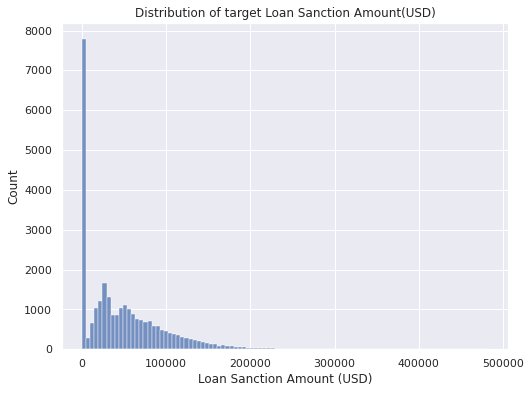

In [35]:
plt.figure(figsize=(8, 6))

target = train['Loan Sanction Amount (USD)']
sns.histplot(x=target)
plt.title('Distribution of target Loan Sanction Amount(USD)')
plt.show()

<p>A lot of the target values are Zero which indicates that they were not given any loan. We should see how our target distribution looks without zero</p>

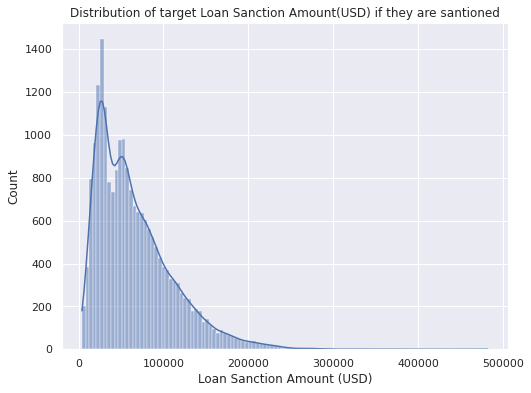

In [36]:
plt.figure(figsize=(8, 6))

sns.histplot(x=target[target>0], kde=True)
plt.title('Distribution of target Loan Sanction Amount(USD) if they are santioned')
plt.show()

In [37]:
target[target>0].describe()

count    20899.00000
mean     65929.41552
std      44896.39333
min       4023.18000
25%      30356.53500
50%      55177.65000
75%      89146.97000
max     481907.32000
Name: Loan Sanction Amount (USD), dtype: float64

In [38]:
print(f"The target has a skewness of {target.skew()}")
print(f"The target has a peakedness of {target.kurtosis()}")

The target has a skewness of 1.2276852265205898
The target has a peakedness of 1.7688603413820507


Acceptable range for skewness -  (-3 to +3)<Br>
Acceptable range for kurtosis -  (-10 to +10)

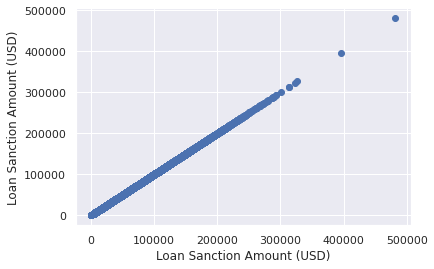

In [39]:
# looking for outlayers
plt.scatter(target, target)
plt.xlabel('Loan Sanction Amount (USD)')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()

We can do power transformation to reduce the skewness using different transformation like log, box-cox or johnson transformation

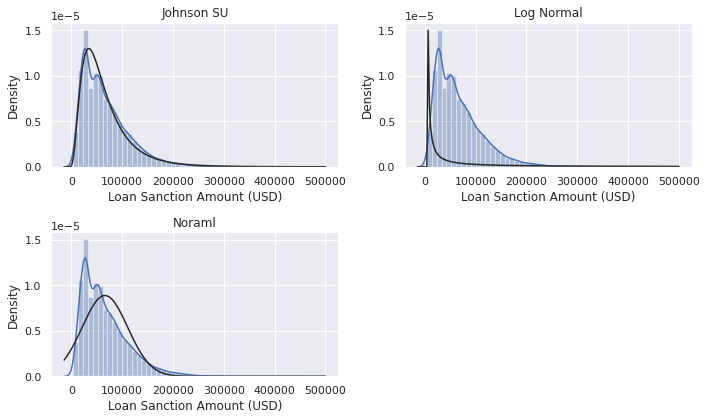

In [40]:
# remvoing 0 values to do transformation
target_without_zero = target[target > 0]

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1);
sns.distplot(target_without_zero, fit=stats.johnsonsu)
plt.title('Johnson SU')

plt.subplot(2, 2, 2)
sns.distplot(target_without_zero, fit=stats.lognorm)
plt.title("Log Normal")

plt.subplot(2, 2, 3)
sns.distplot(target_without_zero, fit=stats.norm)
plt.title("Noraml")

plt.tight_layout()

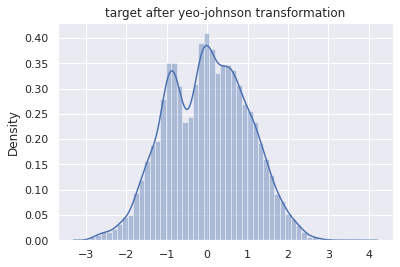

In [41]:
target_transformed = pd.Series(PowerTransformer().fit_transform(target_without_zero.to_frame()).flatten())

sns.distplot(x= target_transformed)
plt.title("target after yeo-johnson transformation")
plt.show()

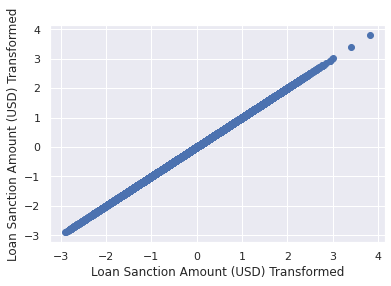

In [42]:
plt.scatter(target_transformed, target_transformed)
plt.xlabel('Loan Sanction Amount (USD) Transformed')
plt.ylabel('Loan Sanction Amount (USD) Transformed')
plt.show()

In [43]:
print(f"The target has a skewness of {target_transformed.skew()} after transformation")
print(f"The target has a peakedness of {target_transformed.kurtosis()} after transformation")

The target has a skewness of -0.02212240045783058 after transformation
The target has a peakedness of -0.48000818248513344 after transformation


****INSIGHTS:****
<BR>
* Target has a lot of zero values indicating no loan sanction 
* The target show some skewness and peakedness and does not follow normal distribution
* There are 2 unusally high values in target features
    
****NOTES:****
<BR>
* We can log transformation or Johnson Transformation on target to normalize it
* We can handle zero inflated target variable by creating two models where classification model will predict if the person will have loan sanctioned or not and regression model would predict loan amount if they were given loan sanction. To do this we will create a feature we will predict if someone was given sanction or not
    
Before doing anything else we will create a feature on loan santioned or not
  
<br>
    You can find more about hadling zero inflated target from the article <a href='https://towardsdatascience.com/zero-inflated-regression-c7dfc656d8af'>Zero-Inflated Regression</a> by <b>Dr. Robert Kübler</b>

In [44]:
train['Loan Sanctioned'] = train['Loan Sanction Amount (USD)'] > 0

Loan Santioned feature target feature for classification and so we will anayliz it too

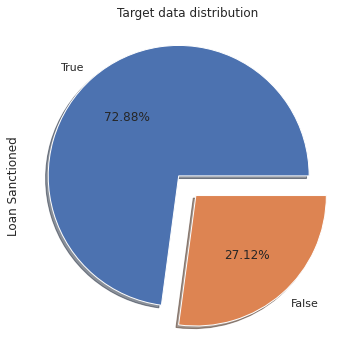

In [45]:
plt.figure(figsize=(8, 6))

train['Loan Sanctioned'].value_counts().plot(kind='pie', explode=[0.1, 0.1], 
                                            autopct='%2.2f%%', shadow=True)

plt.title('Target data distribution')
plt.show()

****INSIGHTS:****
<BR>
* Loan Santioned target feature is not balanced

****NOTES:****
<br>    
* May need to use sampling method to increase accuracy like oversampling, undersamplig, smothing etc
    
We are done with analyzing target variables now we will analyze continous data and see their relationship with both of the target variables

<H4>ANALYZING CONTINOUS DATA</H4>

- see basic overview
- plot distribution
- look for outliers
- what kind of relation with target can we infer from the scatterplot

****basic overview****

In [46]:
con_feats = train.select_dtypes(include=['float', 'int']).columns
info_cols = ['min', 'max', 'mean', '50%', 'std']

print("Training sets overview: ")
display(train[con_feats].describe().loc[info_cols])

Training sets overview: 


,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Co-Applicant,Property Price,Loan Sanction Amount (USD)
min,18.00000,377.70000,6048.24000,33.76000,1.00000,580.85000,0.00000,1.00000,0.00000,7265.95000,0.00000
max,65.00000,1777460.21000,621497.82000,3840.88000,14.00000,896.26000,1.00000,999.00000,1.00000,1077966.73000,481907.32000
mean,40.12042,2633.19580,88842.82043,409.23100,2.25410,740.06358,0.19394,501.85262,0.85244,133294.28822,48052.55127
50%,40.00000,2222.52000,75094.78500,376.52000,2.00000,740.08500,0.00000,504.00000,1.00000,111273.23000,35842.39000
std,16.06254,11488.96023,59499.68400,217.65967,0.95201,72.15044,0.39539,288.12996,0.35466,92837.66828,48251.10897


We can see that although mean and median are very close most of the time mean is generally greater than median indicating that there are outlayers present in training dataset feature

## Analyzing Features for Regression


### continous features

In [47]:
 # dataset with only loan Santioned amount greater zero to help analyzing
train_greater_than_zero = train[train['Loan Sanction Amount (USD)'] > 0]

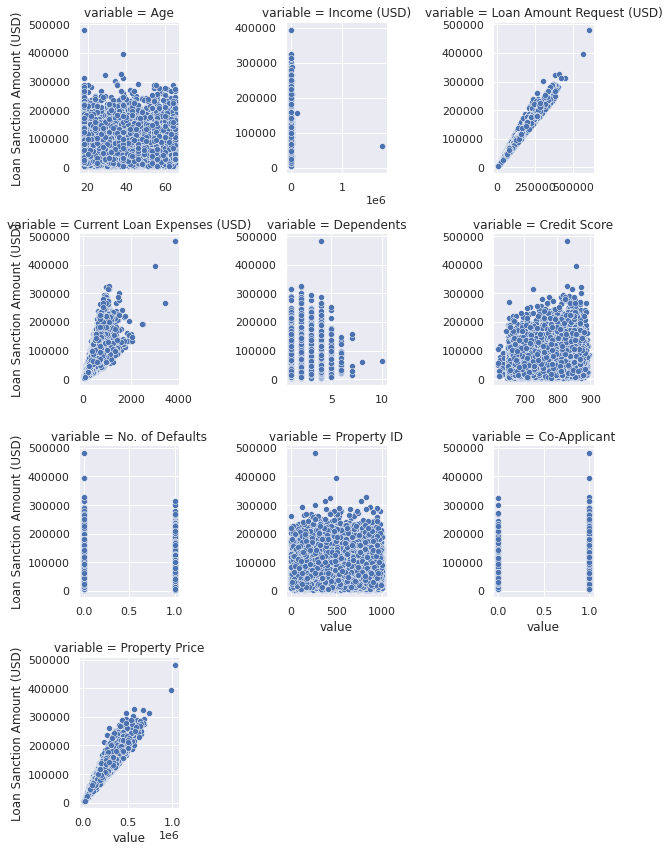

In [48]:
f = train_greater_than_zero.melt(value_vars=con_feats, id_vars=['Loan Sanction Amount (USD)'])
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=3)
g.map(sns.scatterplot, 'value', 'Loan Sanction Amount (USD)')
plt.show()

We can easily spot some outlayers in some features like Income (USD), Current Loan Expenses, Dependents. We will remove them but before that we will need to fill in the null values for these features as with something as comparing something will null values will give us false. 

In [49]:
out_vars = ['Income (USD)', 'Current Loan Expenses (USD)', 'Dependents']
train[out_vars] = train[out_vars].fillna(-1) # filling in nulls with -1

filt = ((train['Income (USD)'] < 18000) & (train['Current Loan Expenses (USD)'] < 2500) )              # filtering out outlayers


train = train[filt]                          # filtered dataframe
train.replace({-1: np.nan}, inplace=True)    # replacing -1 with previous null

In [50]:
train_greater_than_zero=train[train['Loan Sanction Amount (USD)']>0] #updating traingreatetrhanzero

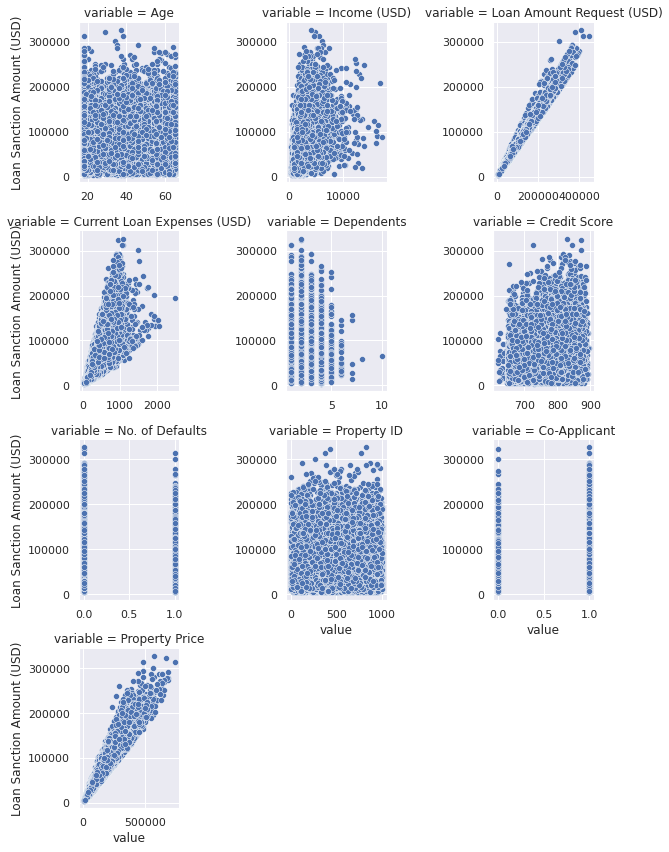

In [51]:
# after cleaning
f = train_greater_than_zero.melt(value_vars=con_feats, id_vars=['Loan Sanction Amount (USD)'])
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, height=3)
g.map(sns.scatterplot, 'value', 'Loan Sanction Amount (USD)')
plt.show()

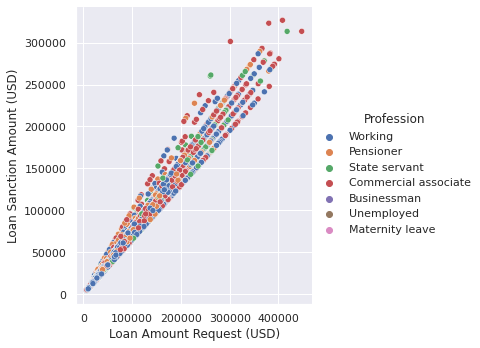

In [52]:
# JUST TESTING SOME RANDOM THINGS try and see if any combination works 
# plt.figure(figsize=(15, 7))
sns.relplot(x='Loan Amount Request (USD)', y='Loan Sanction Amount (USD)', hue='Profession', data=train_greater_than_zero)

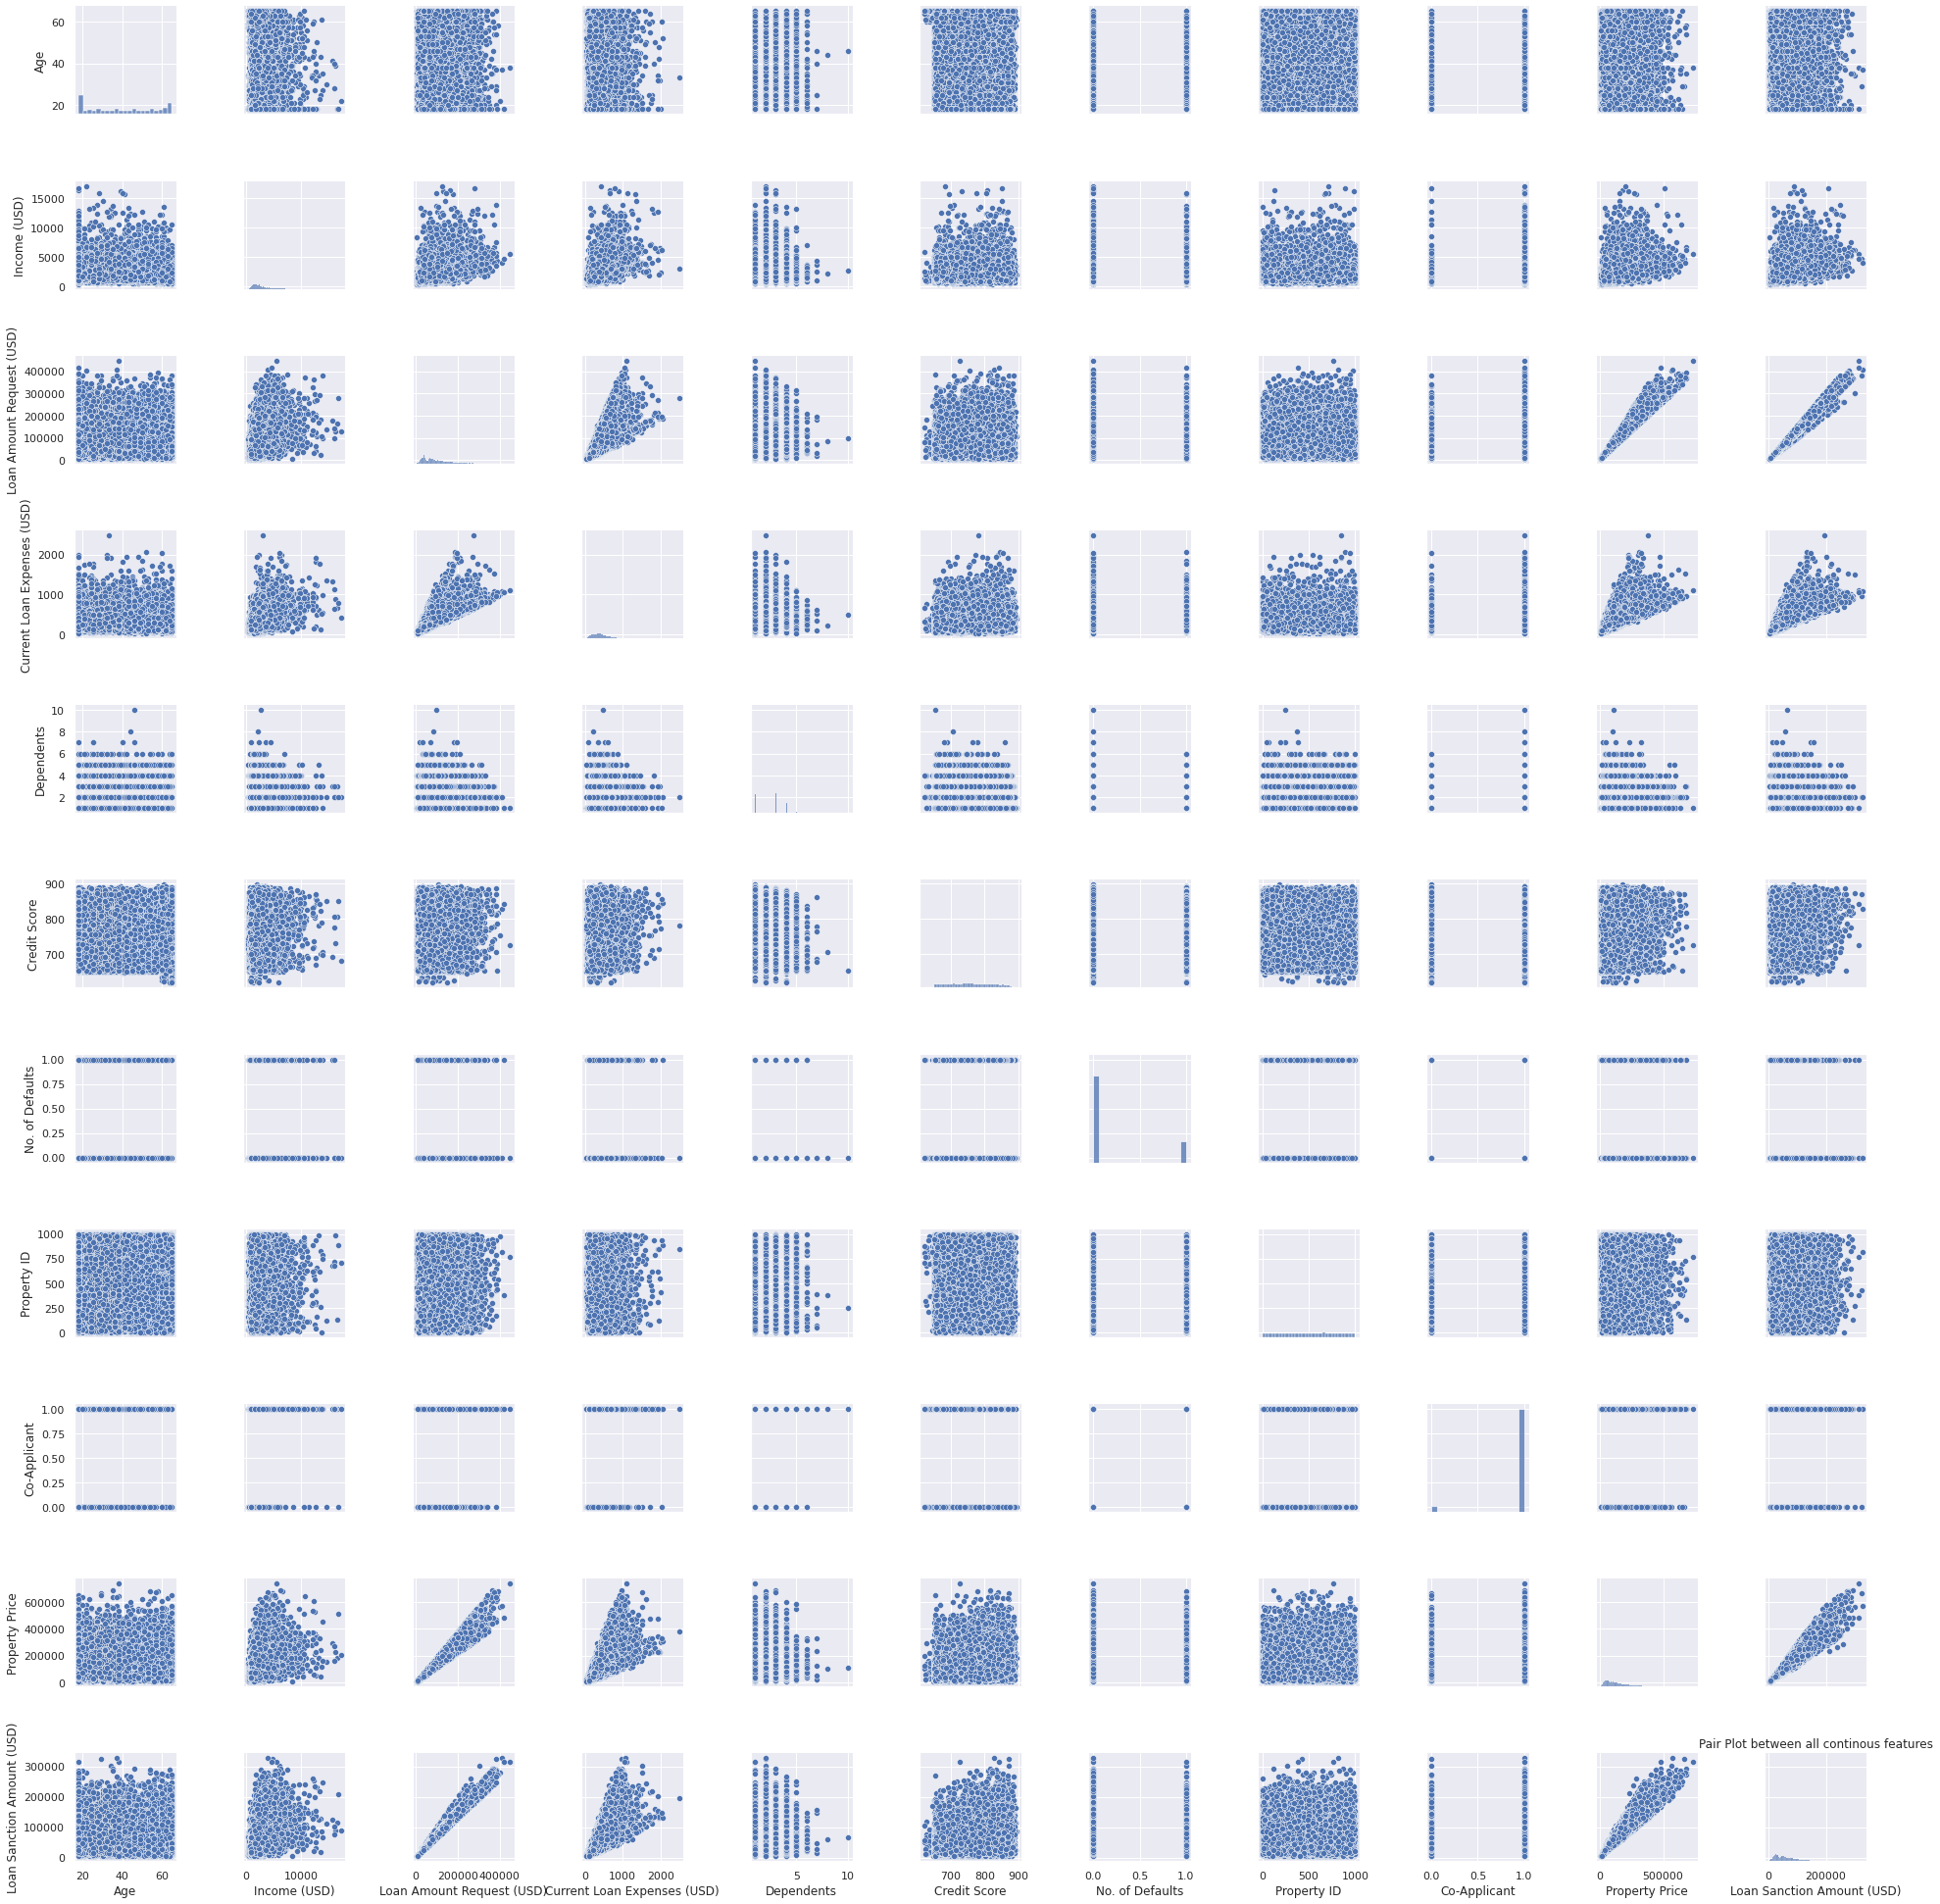

In [53]:
# overview for all continous features
sns.pairplot(train_greater_than_zero[con_feats])
plt.title("Pair Plot between all continous features")
plt.show()

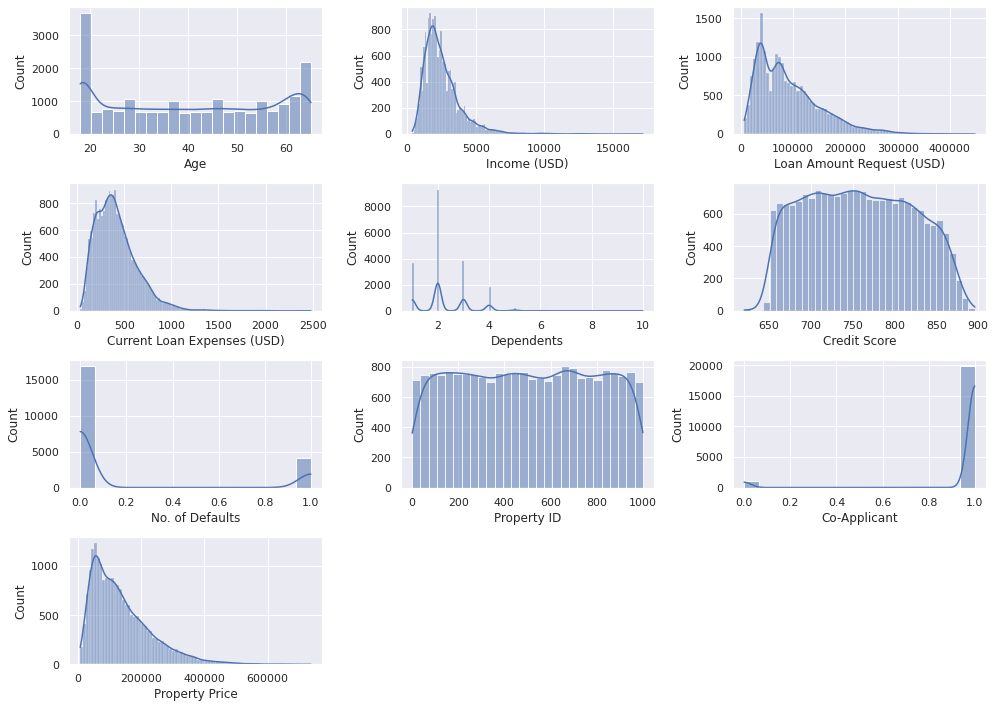

In [54]:
# to see distribution
plt.figure(figsize=(14, 10))
for index, col in enumerate(con_feats):
    if col == 'Loan Sanction Amount (USD)':
        continue
    
    plt.subplot(4, 3, index+1)
    sns.histplot(train_greater_than_zero[col], kde=True)

    
plt.tight_layout()

****INSIGHTS:****
<br>
* There are some outlayers present in Income (USD), Current Loan Expenses (USD), Dependents
* Most continous values does not have a normal distribution
* Age surprising does not show any relation with target

****NOTES:****
<br>
* <strike>Remove outlayers</strike>
* Applying log or other transformation for normal distriubtion
* Try feature engineering on feature likes Age which surprisingly does not show any relationship
* Try different feature engineering techniques on different features like adding Income + Property Price to find the net worth

### categorical features

In [55]:
# removing Customer ID for high cardianility 
# removing Loan Sanctioned(target) as it is derived from Loan Sanction Amont (target) and
# only contain one category in train_greate_than_zero
cat_feats=train.drop(columns=['Customer ID', 'Loan Sanctioned']).select_dtypes(include=['object']).columns
train_greater_than_zero[cat_feats].head()

,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Type,Property Location
0,F,Low,Working,Sales staff,Semi-Urban,N,N,NaN,Property_type_4,Rural
1,M,Low,Working,NaN,Semi-Urban,N,Y,Unpossessed,property_type_2,Rural
2,F,High,Pensioner,NaN,Semi-Urban,N,Y,Unpossessed,property_type_2,Urban
3,F,High,Pensioner,NaN,Rural,N,Y,Unpossessed,property_type_2,Semi-Urban
4,F,Low,Working,High skill tech staff,Semi-Urban,N,Y,Active,Property_type_4,Semi-Urban


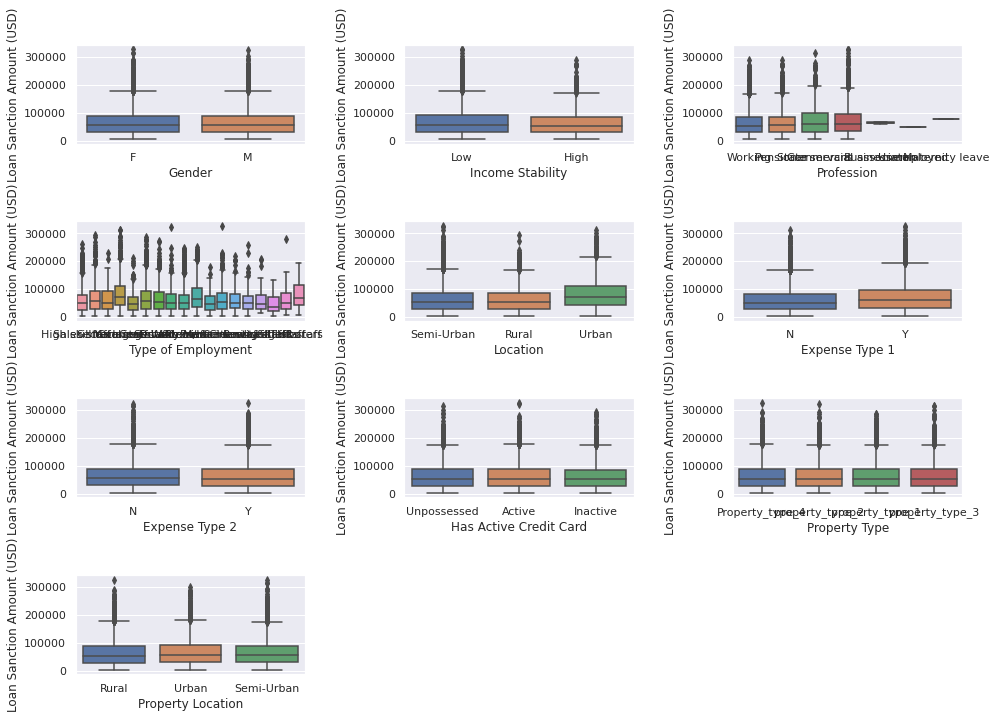

In [56]:
plt.figure(figsize=(14, 10))
for index, col in enumerate(cat_feats):
    plt.subplot(4, 3, index+1)
    sns.boxplot(x=col, y='Loan Sanction Amount (USD)', data=train_greater_than_zero)
    
plt.tight_layout()

The Profession feature looks weird lets check that out

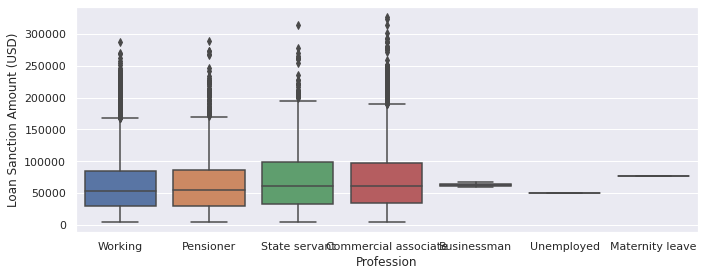

In [57]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Profession', y='Loan Sanction Amount (USD)', data=train_greater_than_zero)
plt.tight_layout()

In [58]:
train_greater_than_zero['Profession'].value_counts()

Working                 11303
Commercial associate     5596
Pensioner                2279
State servant            1700
Businessman                 2
Unemployed                  1
Maternity leave             1
Name: Profession, dtype: int64

Some categories in Profession has very few observation we need to do something about them<br>
Although we can see some features which can be useful to regression but they are hardly any difference visibable. I t is because box plot alone can not tell the whole picture about data. We can try violin plot

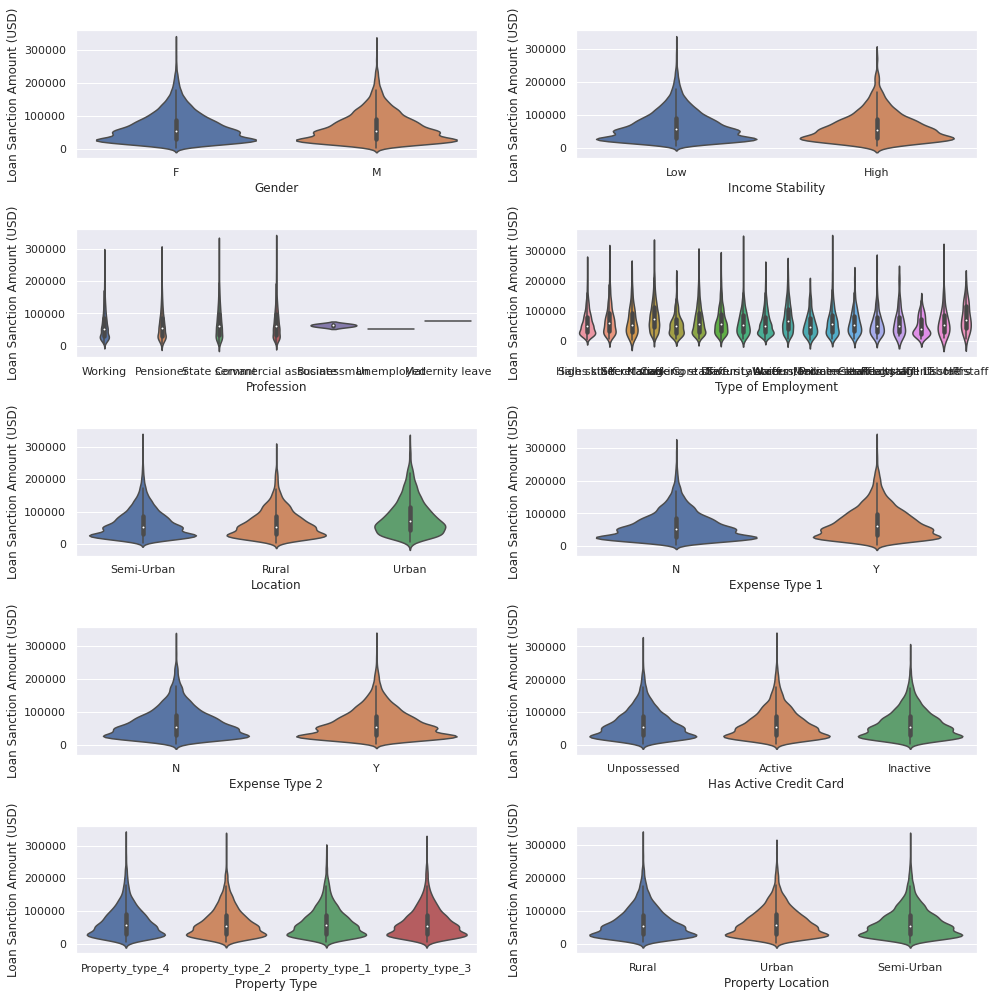

In [59]:
plt.figure(figsize=(14, 14))
for index, col in enumerate(cat_feats):
    plt.subplot(5, 2, index+1)
    sns.violinplot(x=col, y='Loan Sanction Amount (USD)', data=train_greater_than_zero)
    
plt.tight_layout()

Even with violin plot it is hard to find useful features as every featrues categories has almost the same median and distribution or pdf. In simpler terms categories of a featrue can express variation of target feature meaning they are useless. 
But Profession, Types of Employment, Location, Expense Types 1 and 2 seems like useful feature

So to find useful feature we will use <b>ANOVA<b/>.<br>
To learn more about feature selection with anova you can check this article <a href='https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476'>ANOVA for Feature Selection in Machine Learning</a> by <b>Sampath Kumar Gajawada</b>.
Khan Academy's video on Anova is very good and can be found in youtube <a href=''> khan academy</a>

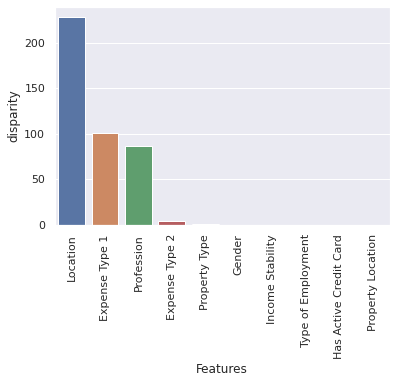

In [60]:
def anova(frame):
    anv = pd.DataFrame()
    anv['Features'] = cat_feats
    pvals = []
    for feats in anv['Features']:
        samples = []
        for category in frame[feats].unique():
            s = frame[frame[feats] == category]['Loan Sanction Amount (USD)'].values
            samples.append(s)
            
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    
    anv['Pvals'] = pvals
    
    return anv.sort_values(by='Pvals')

a = anova(train_greater_than_zero)
a['disparity'] = np.log(1./a['Pvals'].values)
sns.barplot(data=a, x='Features', y='disparity')
plt.xticks(rotation=90)
plt.show()

Othe than Type of Employment Anova was able catch all those values which thought to be imporatnt

****INSIGHTS:****
<BR>
* Loan Sanction only has one categroy in train_greater_than_zero
* Most of the categorical features are  useless as they do not explain much variability in target feature other than Location, Expense Type, Profession, Type of Employment(was not able capture throught anova but was able identify from the violin) 
* Profession Feature has few categories which has observations less than 5.
    
****NOTES:****
<BR>
* Do not use CustomerId and Loan Santioned when doing regression
* Keep all other features even if they may appear useless
* Filter out the other categories which has less than 5 observation from Profession Feature or group them into one category Other
* Add two Expenses feature and make them one new feature since they are related

## Analyzing for Classification
For classification we will analyze with a sample of the training set with equal amount True and False values in the target feature so that we can easily find realtion with other feature

In [61]:
# we do not need Loan Sanction Amount (USD) which is a target feature  
train_clf = train.drop(columns=['Loan Sanction Amount (USD)'])

In [62]:
train_clf['Loan Sanctioned'].value_counts()

True     20882
False     7770
Name: Loan Sanctioned, dtype: int64

In [63]:
false_count = train_clf['Loan Sanctioned'].value_counts()[False]
train_true_sample = train_clf[train_clf['Loan Sanctioned'] == True].sample(false_count)
train_false_sample = train_clf[train_clf['Loan Sanctioned'] == False]

train_clf_sample = pd.concat([train_true_sample, train_false_sample])
train_clf_sample['Loan Sanctioned'].value_counts()

True     7770
False    7770
Name: Loan Sanctioned, dtype: int64

###categorical features</b>

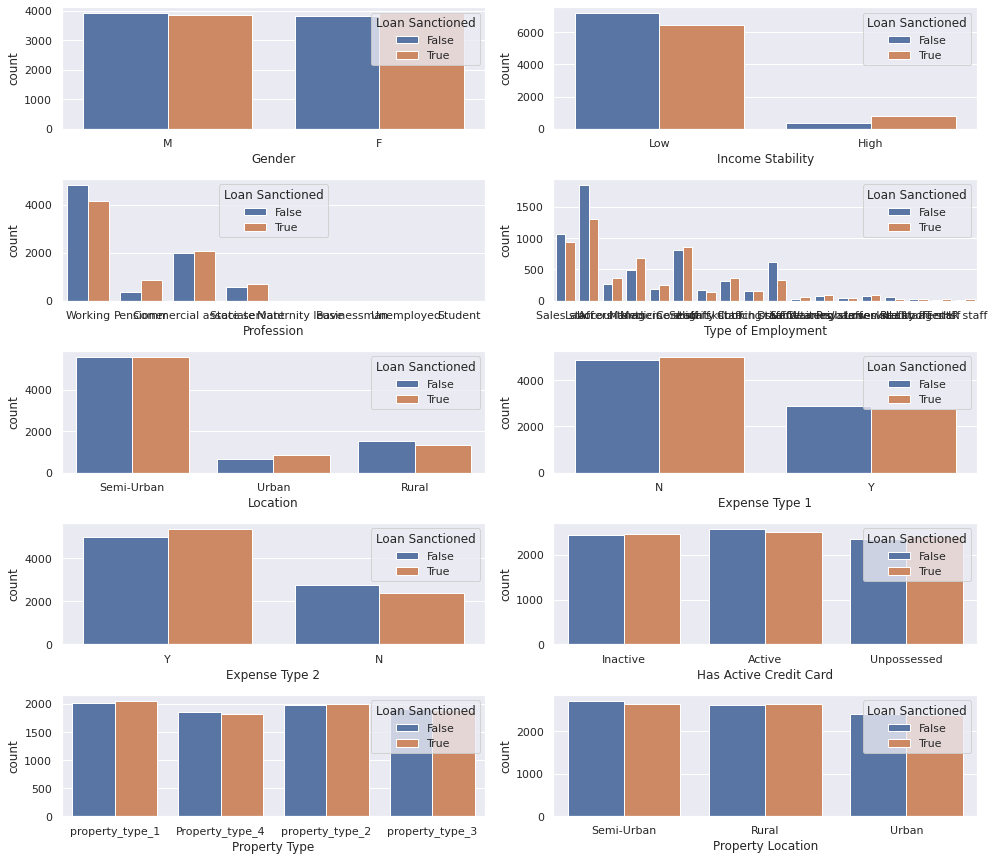

In [64]:
plt.figure(figsize=(14, 14))
lenged = True
for index, col in enumerate(cat_feats):
    if col == 'Loan Santioned':
        continue
    plt.subplot(6, 2, index+1)
    sns.countplot(x=col, hue='Loan Sanctioned', data=train_clf_sample)


    
plt.tight_layout()

****INSIGHTS:****
<Br>
* Stability, Profession, Type of Employment, Location, Expense Type, Property Location has an impact on Getting Loan
* Income Stability although a important featurer has very unbalanced data
* Gender, Property Location does not have impact on target

****NOTES****
* Location can converted to orderly categorical data


### continous features

In [65]:
con_feats = train_clf_sample.select_dtypes(include=['float', 'int']).columns

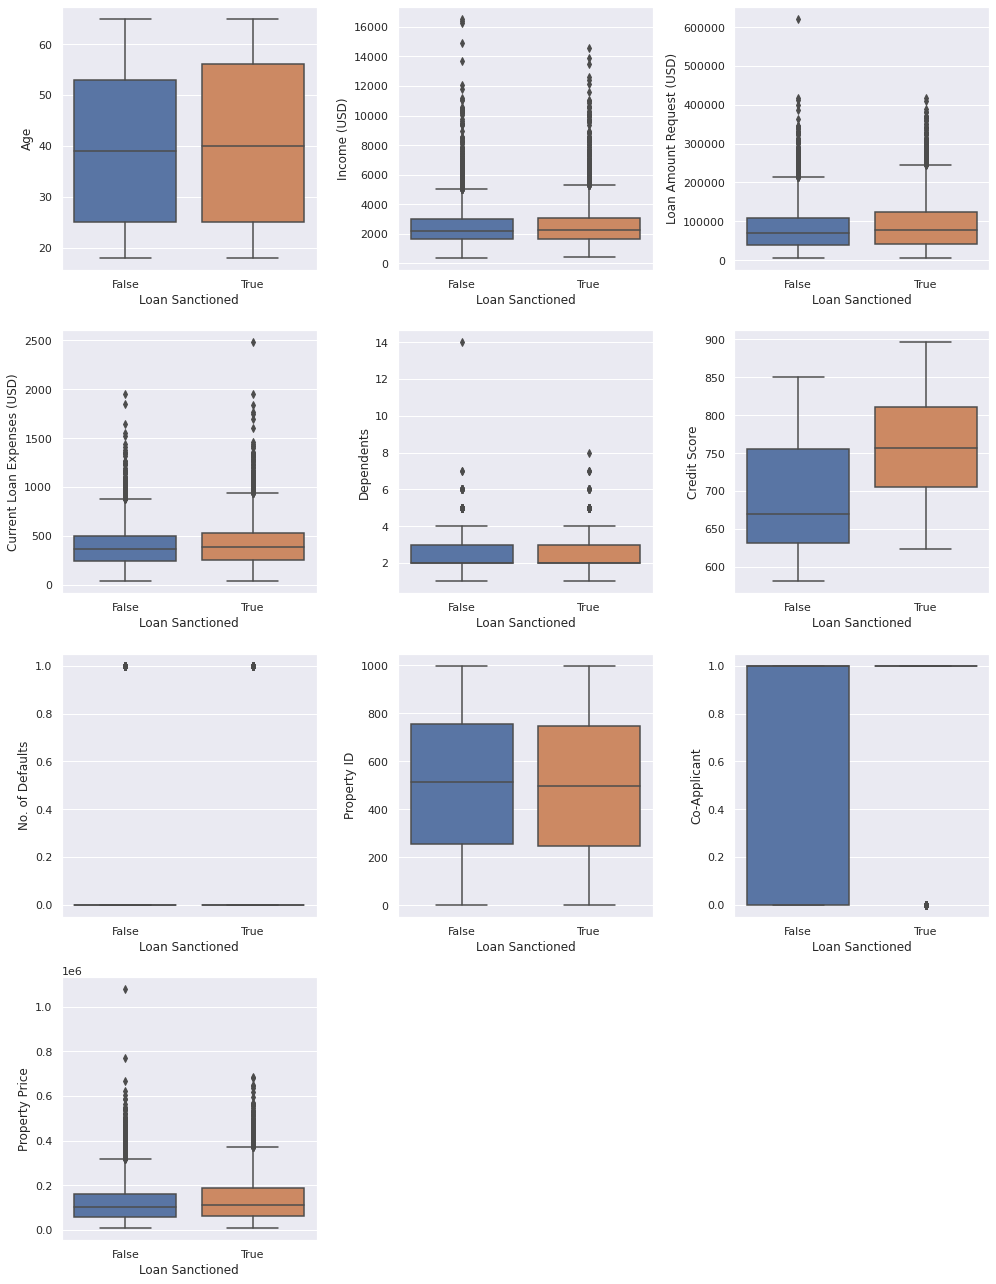

In [66]:
plt.figure(figsize=(14, 18))
for index, col in enumerate(con_feats):
    plt.subplot(4, 3, index+1)
    sns.boxplot(y=col, x='Loan Sanctioned', data=train_clf_sample)

plt.tight_layout()

Lets plot violin plot next to see distribution too

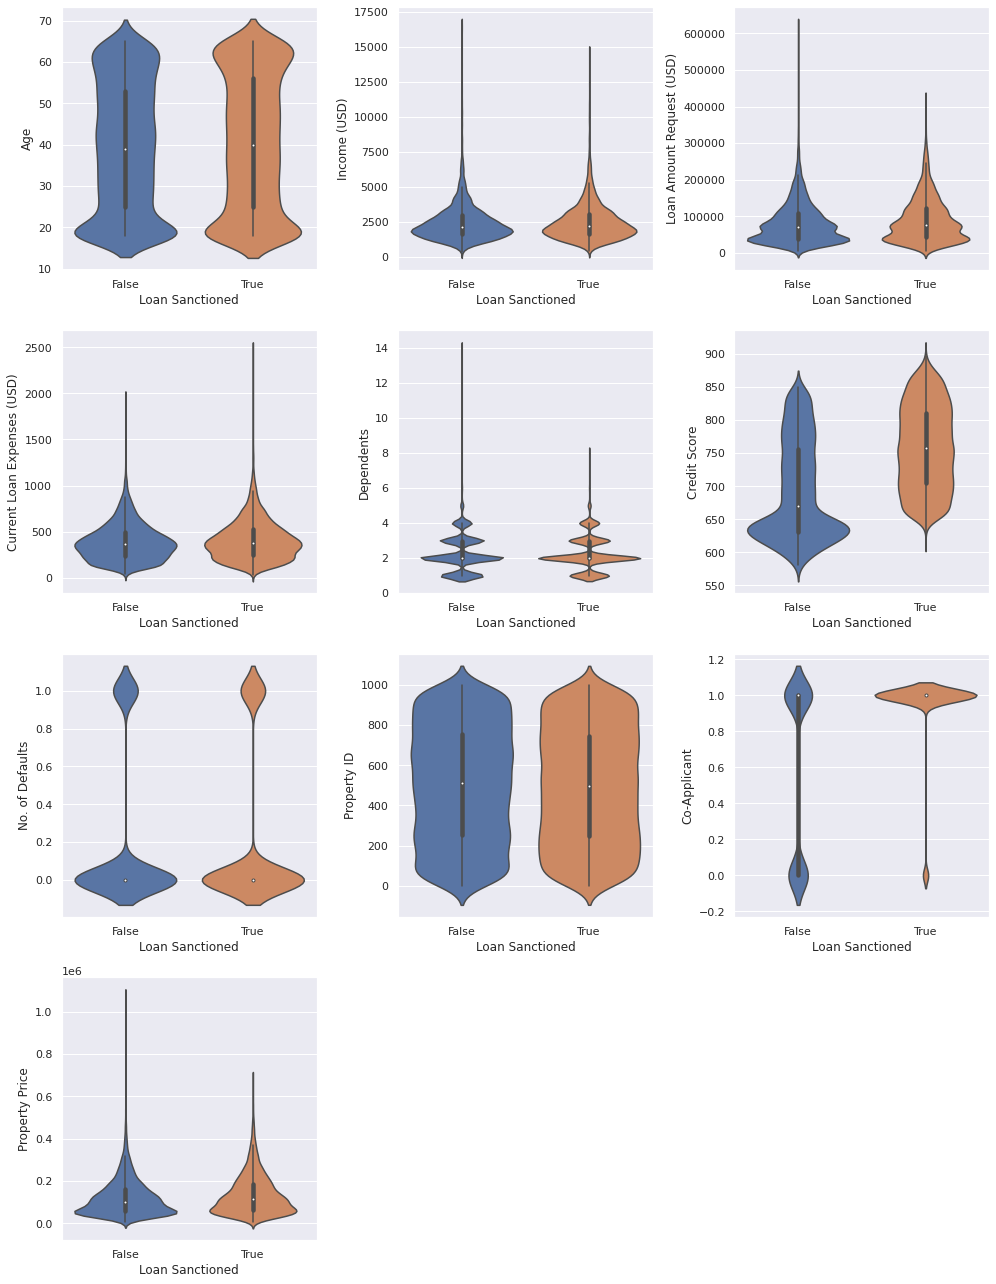

In [67]:
plt.figure(figsize=(14, 18))
for index, col in enumerate(con_feats):
    plt.subplot(4, 3, index+1)
    sns.violinplot(y=col, x='Loan Sanctioned', data=train_clf_sample)

plt.tight_layout()

At a glance we can see at a glance that Credit Score is very important while other has minor impact on the result. There also some features with unbalanced data like Co-Applicant, No. of Defaults

In [68]:
train_clf_sample['Co-Applicant'].value_counts()

1    11976
0     3564
Name: Co-Applicant, dtype: int64

In [69]:
co_app_count = pd.pivot_table(data=train_clf_sample, index='Co-Applicant', columns='Loan Sanctioned',
              values='Customer ID', aggfunc='count', margins=True)

co_app_count['False_perc'] = (co_app_count[False] / co_app_count['All']) * 100
co_app_count['True_perc'] = 100 - co_app_count['False_perc']
co_app_count

Loan Sanctioned,False,True,All,False_perc,True_perc
Co-Applicant,,,,,
0,3184,380,3564,89.33782,10.66218
1,4586,7390,11976,38.29325,61.70675
All,7770,7770,15540,50.00000,50.00000


From the privot table we can see that Co-applicant is very useful feature. But we were not able to capture it throught box plot while being able to capture it somewhat with violin plot. We will see if treating Co-Applicant as categorical feature has any impact

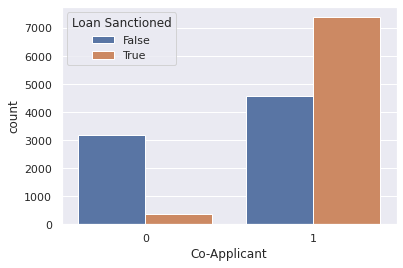

In [70]:
sns.countplot(x=train_clf_sample['Co-Applicant'], hue=train_clf_sample['Loan Sanctioned'])
plt.show()

Co-Applicant has significant impact on target feature. Now we will check out No. of Defautls 

In [71]:
train_clf_sample['No. of Defaults'].value_counts()

0    12520
1     3020
Name: No. of Defaults, dtype: int64

In [72]:
default_count = pd.pivot_table(data=train_clf_sample, index='No. of Defaults', columns='Loan Sanctioned',
              values='Customer ID', aggfunc='count', margins=True)

default_count['False_perc'] = (default_count[False] / default_count['All']) * 100
default_count['True_perc'] = 100 - default_count['False_perc']
default_count

Loan Sanctioned,False,True,All,False_perc,True_perc
No. of Defaults,,,,,
0,6256,6264,12520,49.96805,50.03195
1,1514,1506,3020,50.13245,49.86755
All,7770,7770,15540,50.00000,50.00000


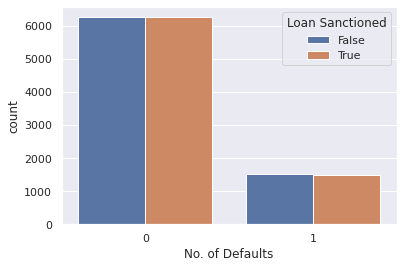

In [73]:
sns.countplot(x='No. of Defaults', hue='Loan Sanctioned', data=train_clf_sample)
plt.show()

No of Defaults does not seem to be very useful feature.
Treating No. of Defautlts and Co-applicant as cateogrical features seemed useful as they only have two category.
Co-Applicant 0 probably mean False
Co-Applicatn 1 probalby mean True

As for No of Defaults it has two categories too. But name does not match with the values. It is probably typing error. 

We should have changeed No of Defaults to just Default in dataCleaing part while also changing their data type to object although it making it easier to find relation with doing analysis although it wouldn't have mattered it the model building part since we would have encoded them to numbers anyway

****From the situation above we can see that using a histgram would be useful to figure out new relation with target Loan Sanctioned.****

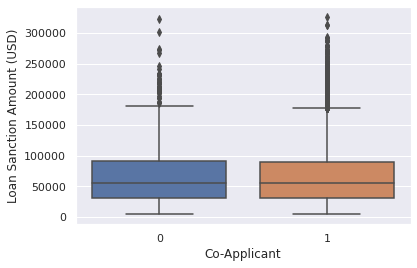

In [74]:
# see if treating these two as  a category has an impact in regression
sns.boxplot(x='Co-Applicant', y='Loan Sanction Amount (USD)', data=train_greater_than_zero)

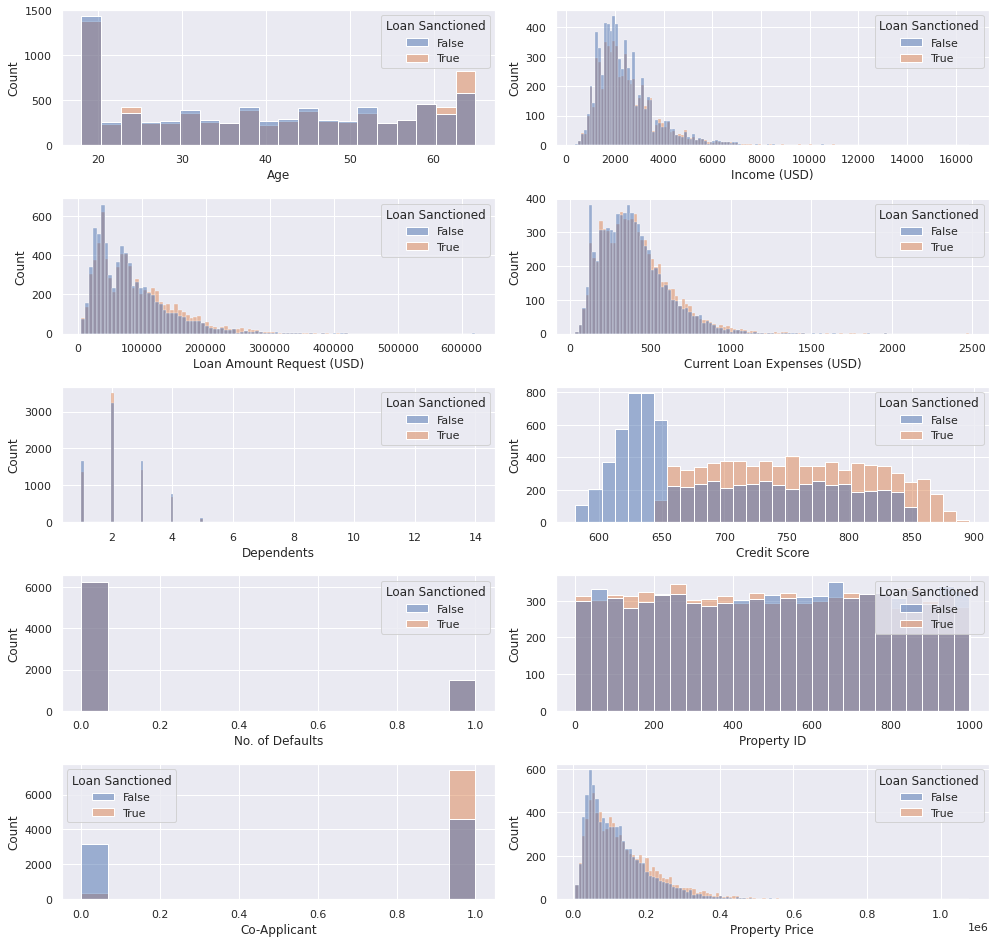

In [75]:
plt.figure(figsize=(14, 18))
for index, col in enumerate(con_feats):
    if index == 1:
        legend = False
    plt.subplot(7, 2, index+1)
    sns.histplot(x=col, hue='Loan Sanctioned', data=train_clf_sample)

    
plt.tight_layout()

The histograms tell a lot of useful patterns. We will explore them one by one

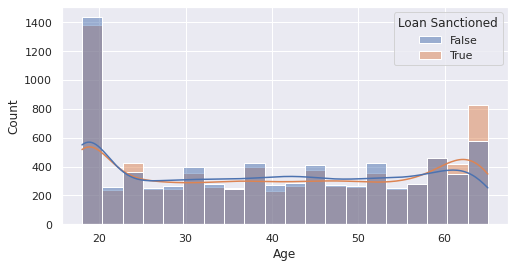

In [76]:
var = 'Age'
plt.figure(figsize=(8, 4))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample, kde=True)
plt.show()

In [77]:
train['Age'].max()

65

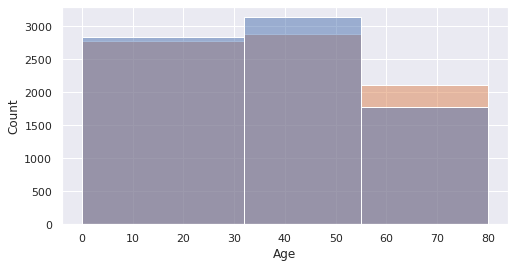

In [78]:
var = 'Age'
plt.figure(figsize=(8, 4))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample, bins=[0, 32, 55, 80], legend=False)
plt.show()

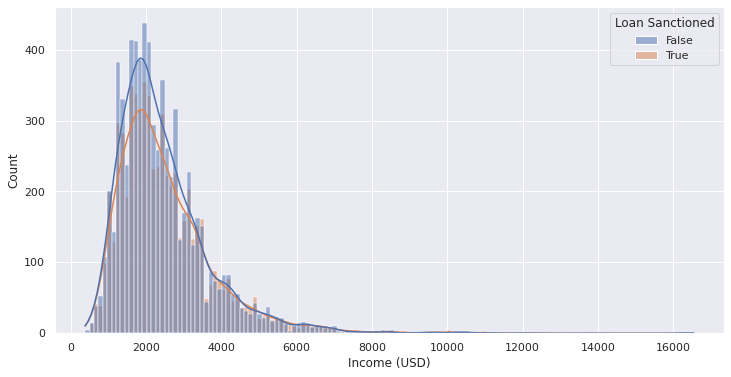

In [79]:
var = 'Income (USD)'
plt.figure(figsize=(12, 6))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample, legend=True, kde=True)
plt.show()

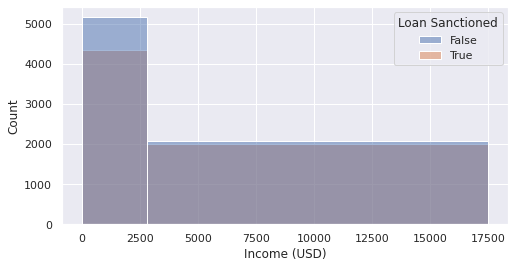

In [80]:
var = 'Income (USD)'
plt.figure(figsize=(8, 4))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample, legend=True, bins=[0, 2800, 17500])
plt.show()

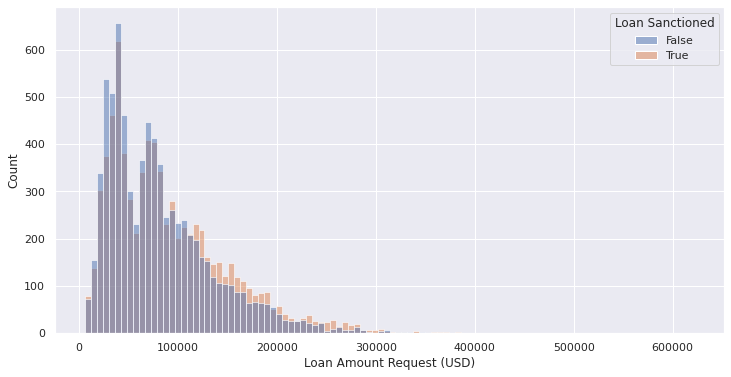

In [81]:
var = 'Loan Amount Request (USD)'
plt.figure(figsize=(12, 6))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample)
plt.show()

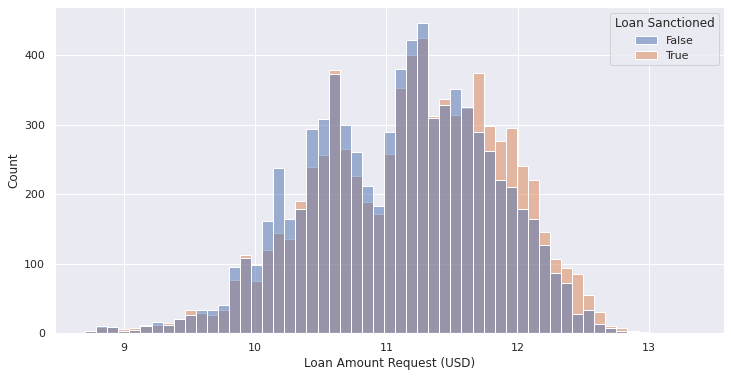

In [82]:
var = np.log(train_clf_sample['Loan Amount Request (USD)'])
plt.figure(figsize=(12, 6))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample)
plt.show()

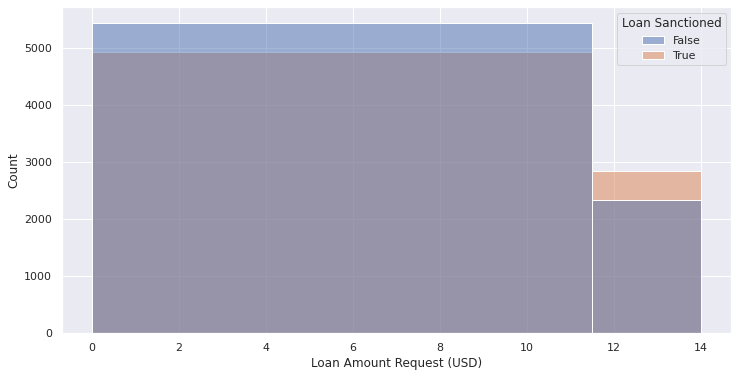

In [83]:
var = np.log(train_clf_sample['Loan Amount Request (USD)'])
plt.figure(figsize=(12, 6))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample, bins=[0, 11.5, 14])
plt.show()

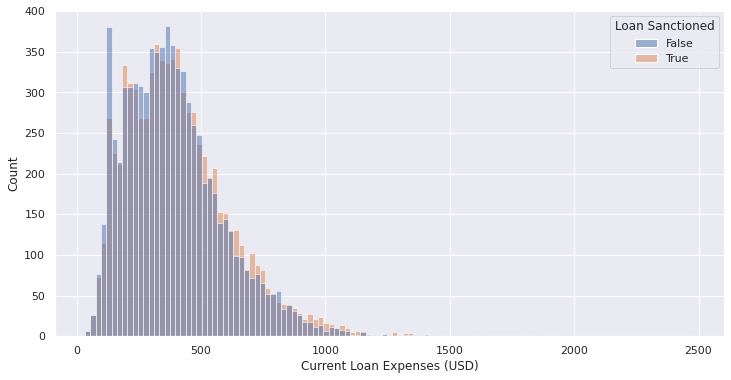

In [84]:
var = 'Current Loan Expenses (USD)'
plt.figure(figsize=(12, 6))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample)
plt.show()

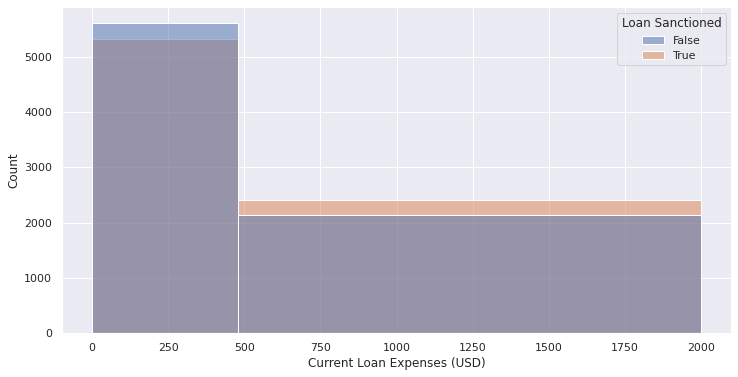

In [85]:
var = 'Current Loan Expenses (USD)'
plt.figure(figsize=(12, 6))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample, bins=[0, 480, 2000])
plt.show()

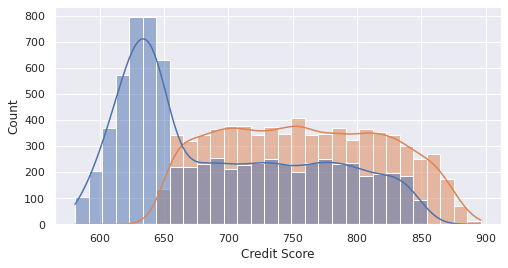

In [86]:
var = 'Credit Score'
plt.figure(figsize=(8, 4))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample, legend=False, kde=True)
plt.show()

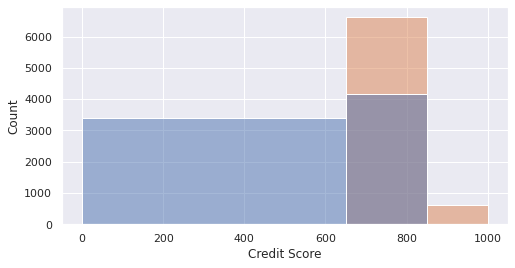

In [87]:
var = 'Credit Score'
plt.figure(figsize=(8, 4))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample, legend=False, bins=[0, 650, 850, 1000])
plt.show()

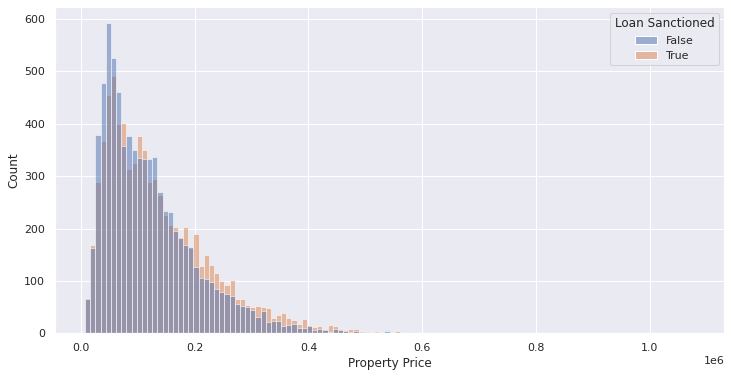

In [88]:
var = 'Property Price'
plt.figure(figsize=(12, 6))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample)

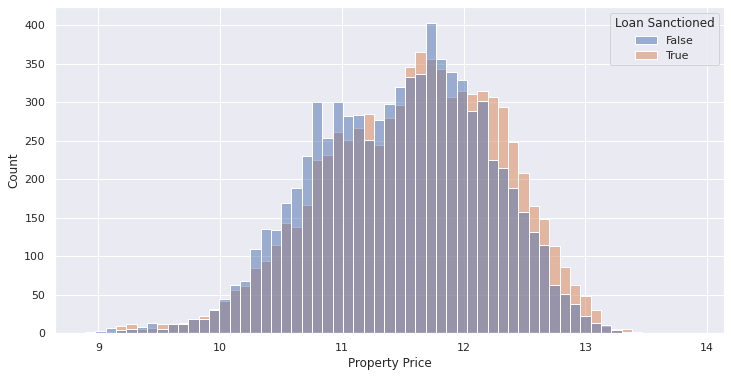

In [89]:
var = np.log(train_clf_sample['Property Price'])
plt.figure(figsize=(12, 6))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample)

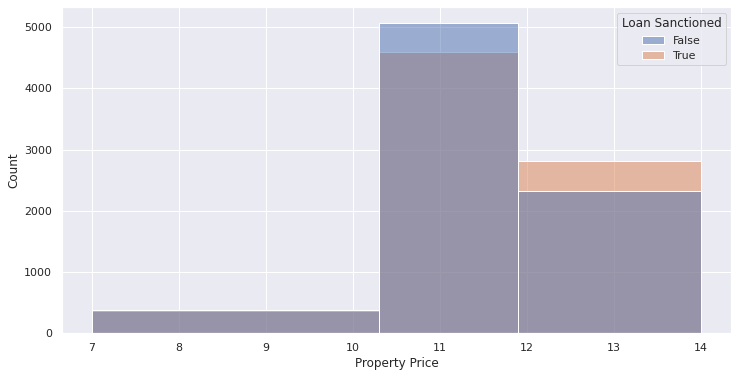

In [90]:
var = np.log(train_clf_sample['Property Price'])
plt.figure(figsize=(12, 6))
sns.histplot(x= var, hue='Loan Sanctioned', data=train_clf_sample, bins=[7, 10.3, 11.9, 14])

****NOTES:****
<br>
* More credits, Co-Applicants has greater chances of having Loan Sanctioned
* Loan Amount Requested, Current Loan Expenses, Property Price, Age impacts the target value when they cross certain threshold
* Those who have co-applicants has more chances of getting loans

****INSIGHTS:****
<br>

* Convert Credit score , Loan Amount Requested, Current Loan Expenses, Property Price, 
* Create new feature from Credit Score, Loan Amount Request, Age Income, Current Loan Expenses, Property Price needs to convet to categorical feature as they contain more information that way
  * Credit Score - thresholds - [0, 650, 850, 1000]
  * Property Price - log - thresholds - [7, 10.3, 11.9, 14]
  * Current Loan Expenses (USD) - thresholds - [0, 480, 2000]
  * Loan Amount Request (USD) - thresholds - [0, 11.5, 14]
  * Age - thresholds - [0, 32, 55, 80]
  * Income (USD) - [0, 2800, 17500]
* Dependents looks unusal spike in getting Loan when it's value is 2. So to tell the model about this information we will create a feature which will tell if Dependents is 2 or not

## Missed Analysis

```
`# This is formatted as code`
```



When we were doing analysis for regression we used Co-Applicant, No of Defaults, Dependents as discrete quantitive data althouh they are ordinal quantitive data. Now will do analysis for regression treating these features as categorical data

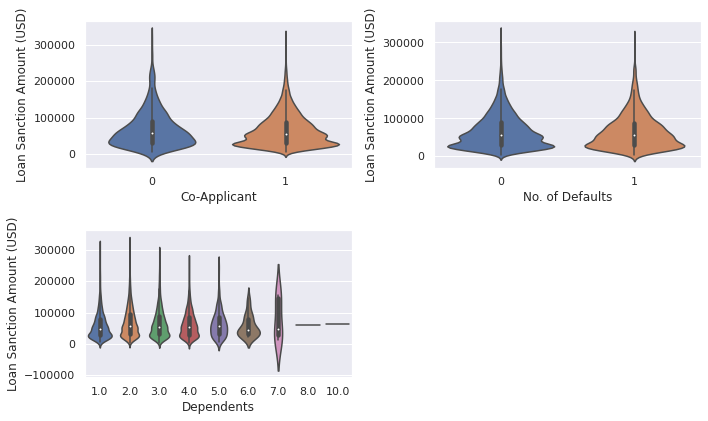

In [91]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.violinplot(x='Co-Applicant', y='Loan Sanction Amount (USD)', data=train_greater_than_zero)

plt.subplot(2, 2, 2)
sns.violinplot(x='No. of Defaults', y='Loan Sanction Amount (USD)', data=train_greater_than_zero)

plt.subplot(2, 2, 3)
sns.violinplot(x='Dependents', y='Loan Sanction Amount (USD)', data=train_greater_than_zero)

plt.tight_layout()

These feature looks pretty significat as they have different distribution and so they will be helpful

# MISSING VALUES


****We will not combine training and testing together to avoid data leakage but before all of this we need to split the training dataset into smaller training and validation dataset****

In [106]:
# resampling to avoid sampling bias
seed = 10
train_all = train.sample(frac=1.0, random_state=10)
# splitting into train and validation set
train_set, valid_set = train_test_split(train_all, test_size=0.2, random_state=10)

# checking if the split is correct or not by comparing standard deviation and mean of continous feature a quick and easy way
set_info = ['mean', 'std']

print("Training set: ")
display(train_set.describe().loc[set_info])

print("Validation set: ")
valid_set.describe().loc[set_info]

Training set: 


,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Co-Applicant,Property Price,Loan Sanction Amount (USD),Income Stability_Ordered,Location_Ordered,Property Location_Ordered,Has Active Credit Card_Ordered,Total Expenses
mean,39.97849,2534.61497,88792.07359,408.51455,2.25723,739.67130,0.19484,503.76149,0.85297,133298.57499,47868.50992,1.09034,1.92269,1.97153,1.01703,1.03264
std,16.07734,1372.14974,59238.94194,213.77541,0.95202,72.13307,0.39609,288.51119,0.35414,92427.06723,47985.38842,0.28667,0.52382,0.80636,0.81566,0.68040


Validation set: 


,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Co-Applicant,Property Price,Loan Sanction Amount (USD),Income Stability_Ordered,Location_Ordered,Property Location_Ordered,Has Active Credit Card_Ordered,Total Expenses
mean,40.70529,2552.44242,88565.05315,408.40886,2.24003,741.35571,0.19002,494.49555,0.85029,132474.46984,48449.19005,1.09766,1.93893,1.97093,1.03009,1.03350
std,15.99251,1397.63589,59396.26451,215.01929,0.95169,72.16011,0.39235,286.47628,0.35682,92306.64529,48423.65944,0.29688,0.52355,0.80361,0.81916,0.67720


The split looks okay. We will reset the index

In [ ]:
train_set.reset_index(drop=True, inplace=True)
valid_set.reset_index(drop=True, inplace=True)

In [113]:
# missing values percenage in each feature
no_of_rows = train_set.shape[0] 
missing_df = train_set.isnull().sum().sort_values(ascending=False).to_frame(name='Missing_count')
missing_df['Missing_percentage'] = np.round((missing_df['Missing_count'] / no_of_rows)*100, 3)
missing_df

,Missing_count,Missing_percentage
Type of Employment,5578,24.33600
Income (USD),3418,14.91200
Dependents,1854,8.08900
Credit Score,1288,5.61900
Income Stability,1258,5.48800
Income Stability_Ordered,1258,5.48800
Has Active Credit Card_Ordered,1189,5.18700
Has Active Credit Card,1189,5.18700
Total Expenses,1013,4.42000
Property Location_Ordered,268,1.16900


In [164]:
train_set[train_set['Property ID'] == 92][['Property ID', 'Property Location']].sample(5)

,Property ID,Property Location
18145,92,Rural
17943,92,Rural
17787,92,Rural
18418,92,Rural
2743,92,Rural


In [168]:
train_set.groupby(['Property ID', 'Property Location']).size().unstack().fillna(0)

Property Location,Rural,Semi-Urban,Urban
Property ID,,,
1,0.00000,0.00000,27.00000
2,0.00000,0.00000,20.00000
3,0.00000,0.00000,19.00000
4,0.00000,22.00000,0.00000
5,0.00000,21.00000,0.00000
...,...,...,...
995,0.00000,22.00000,0.00000
996,0.00000,0.00000,19.00000
997,0.00000,22.00000,0.00000


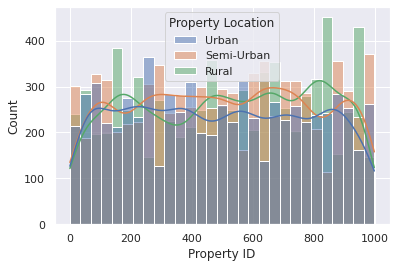

In [157]:
sns.histplot(x='Property ID', hue='Property Location', data=train_set, kde=True)

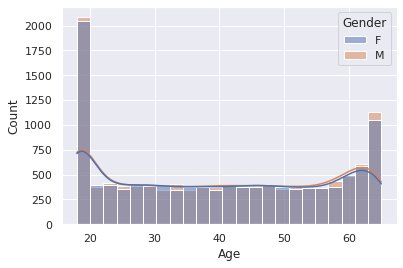

In [155]:
sns.histplot(x='Age', hue='Gender', data=train_set, kde=True)

<b>HEATMAP</b>

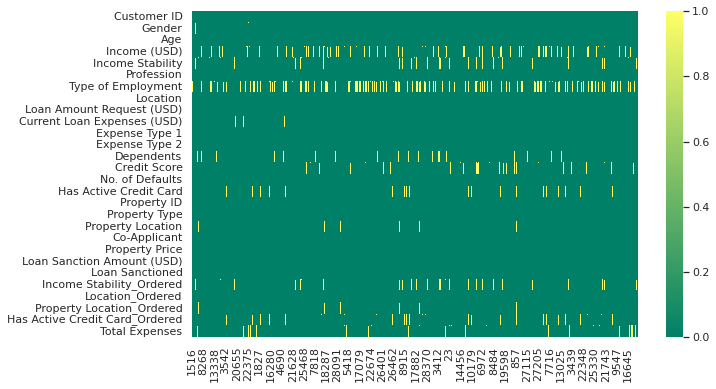

In [120]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_set.isnull().T, cmap='summer')

Missing values pretty much looks random

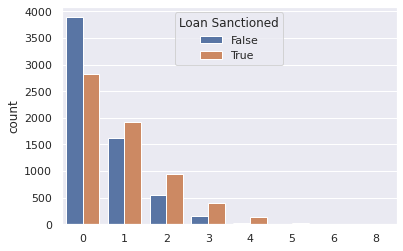

In [140]:
# look into it more
# taking equal amount of true and False to compare easity
false_values = train_set[train_set['Loan Sanctioned'] == False]
true_values = train_set[train_set["Loan Sanctioned"] == True].sample(false_values.shape[0])
temp_df = pd.concat([false_values, true_values])

missing_per_row = temp_df.isnull().sum(axis=1)

sns.countplot(x=missing_per_row, hue=temp_df['Loan Sanctioned'])

<p>Missing values in each feature are independet of each other and does not impact target feature that much. </p>

# Feature Engineering

First we will Feature Engineer feature which needed to be transformed whether they will used for classification or regression.


In [124]:
do analysais on property id

SyntaxError: ignored

We will start with Profession feature

In [125]:
train['Profession'].value_counts()

Working                 16145
Commercial associate     7594
Pensioner                2652
State servant            2255
Other                       6
Name: Profession, dtype: int64

adding Other category where no. of observation for Profession is less than 5

In [126]:
var = 'Profession'
# grouping by Profession and counting each profession and if each category has less than 5 observation
# we will return them as other
train[var] = train.groupby(var)[var].transform(lambda x: x if x.count()> 5 else "Other")
test[var] = test.groupby(var)[var].transform(lambda x: x if x.count()> 5 else "Other")

normally we will fit transform the train and use only transform(based on the values of train set) on test set without doing any calculaton on test set but since the categories and their counts are pretty much the same  in train and test we will compute them seperately while coming to the same answer if we were to do it in the hard and more complicated way

<p>We create new feature from Income Stabilty, Location, Property Location, Has Active Credit Card by endcoding them in order since they are ordinal data</p>

In [127]:
print(f"Income stability: {train['Income Stability'].unique()}")
print(f"Income Location: {train['Location'].unique()}")
print(f"Income Property: {train['Property Location'].unique()}")
print(f"Income Has Active Credit Card: {train['Has Active Credit Card'].unique()}")

Income stability: ['Low' 'High' nan]
Income Location: ['Semi-Urban' 'Rural' 'Urban']
Income Property: ['Rural' 'Urban' 'Semi-Urban' nan]
Income Has Active Credit Card: [nan 'Unpossessed' 'Active' 'Inactive']


In [128]:
train['Income Stability'].isnull().sum()

1572

In [129]:
train['Income Stability_Ordered'] = train['Income Stability'].replace({'Low': 1, 'High': 2})
train['Location_Ordered'] = train['Location'].replace({'Rural': 1, 'Semi-Urban': 2, 'Urban':3})
train['Property Location_Ordered'] = train['Property Location'].replace({'Rural': 1, 'Semi-Urban': 2, 'Urban':3})
train['Has Active Credit Card_Ordered'] = train['Has Active Credit Card'].replace({'Unpossessed': 0, 'Inactive': 1, "Active": 2})

test['Income Stability_Ordered'] = test['Income Stability'].replace({'Low': 1, 'High': 2})
test['Location_Ordered'] = test['Location'].replace({'Rural': 1, 'Semi-Urban': 2, 'Urban':3})
test['Property Location_Ordered'] = test['Property Location'].replace({'Rural': 1, 'Semi-Urban': 2, 'Urban':3})
test['Has Active Credit Card_Ordered'] = test['Has Active Credit Card'].replace({'Unpossessed': 0, 'Inactive': 1, "Active": 2})

Now we do feature engineer for classification and regression seprately

## Classfication

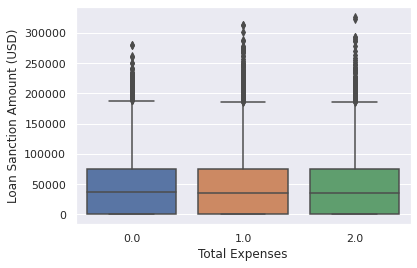

In [130]:
# adding expenses

expense1 = train['Expense Type 1'].factorize()[0]
expense2 = train['Expense Type 2'].factorize()[0]

total_expenses = pd.Series(expense1 + expense2)
train['Total Expenses'] = total_expenses

sns.boxplot(x='Total Expenses', y='Loan Sanction Amount (USD)', data=train)

In [132]:
train['Expense Type 1'].value_counts()

N    18368
Y    10284
Name: Expense Type 1, dtype: int64

In [133]:
 train_greater_than_zero['Expense Type 1'].value_counts()

N    13489
Y     7393
Name: Expense Type 1, dtype: int64

In [134]:
i = train_greater_than_zero[train_greater_than_zero['Expense Type 1'] == 'N'].sample(7609)
j = train_greater_than_zero[train_greater_than_zero['Expense Type 1'] == 'Y'].sample(7609)
print(i['Loan Sanction Amount (USD)'].mean())
j['Loan Sanction Amount (USD)'].mean()

ValueError: ignored

In [ ]:
i = train[train['Expense Type 1'] == 'N'].sample(10538)
j = train[train['Expense Type 1'] == 'Y']

i = pd.concat([i, j])

sns.histplot(hue='Expense Type 2', x='Loan Sanction Amount (USD)', data=i, palette=['red', 'green'])

In [ ]:
plt.figure(figsize=(10, 7))
sns.histplot(hue='Expense Type 2', x='Loan Sanction Amount (USD)', data=train_greater_than_zero, palette=['red', 'green'])

In [ ]:
plt.figure(figsize=(10, 7))
sns.histplot(hue='Expense Type 2', x='Loan Sanction Amount (USD)', data=train_greater_than_zero, palette=['red', 'green'])

In [ ]:
plt.figure(figsize=(10, 7))
sns.histplot(hue='Total Expenses', x='Loan Sanction Amount (USD)', data=train, palette=['red', 'green', 'blue'])

In [ ]:
stats.f_oneway()

In [ ]:
train['Expense Type 1'].shape

In [ ]:
expense1 = train[train['Expense Type 1'] == 'N']['Loan Sanction Amount (USD)']
expense2 = train[train['Expense Type 1'] == 'Y']['Loan Sanction Amount (USD)']

In [ ]:
def get_variance(array):
    array_values = array.values
    mean = np.mean(array_values)

    
    var = (array_values - mean)**2
    return np.sum(var)

In [ ]:
sst = get_variance(train['Loan Sanction Amount (USD)'])
exp1_var = get_variance(expense1)
exp2_var = get_variance(expense2)

In [ ]:
ssb = exp1_var + exp2_var

In [ ]:
exp1_mean = pd.Series(np.zeros(expense1.shape[0]))
exp2_mean = pd.Series(np.zeros(expense2.shape[0]))

exp1_mean.loc[:] = expense1.mean()
exp2_mean.loc[:] = expense2.mean()

In [ ]:
grand_mean = train['Loan Sanction Amount (USD)'].mean()

ssw = np.sum((exp1_mean - grand_mean)**2 + (exp2_mean - grand_mean) ** 2)

In [ ]:
ssw + ssb, exp_var

In [ ]:
dfw = (exp1_mean.shape[0] + exp2_mean.shape[0])-2
dfw

In [ ]:
dfb = 1

In [ ]:
((ssb/dfb) / (ssw/dfw))

In [ ]:
anova = pd.read_csv("./files/anova.csv")
anova.head()

In [ ]:
samples = []
for cls in anova['gurdian'].unique():
    s = anova[anova['gurdian'] == cls]['numbers2'].values
    samples.append(s)

In [ ]:
stats.f_oneway(*samples)

In [ ]:
print(*samples)

In [ ]:
i = stats.f_oneway(*samples)[1]

In [ ]:
np.log(1/i)